Action2	"资金流入流出预测

https://tianchi.aliyun.com/competition/entrance/231573/information

数据集一共包括4张表：用户基本信息数据、用户申购赎回数据、收益率表和银行间拆借利率表


2.8万用户，284万行为数据，294天拆解利率，427天收益率

2013-07-01到2014-08-31，预测2014年9月的申购和赎回"

"1、说明解决方案思路（30points）

2、完成代码，使用时序或其他模型（40points）

3、提交结果Score > 120（30points）"


In [3]:
import pandas as pd
data = pd.read_csv('./Purchase Redemption Data/user_balance_table.csv',  parse_dates=['report_date'])
data.head()

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
0,1,2014-08-05,20385,20383,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
1,1,2014-08-08,20391,20389,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
2,1,2014-08-11,20397,20395,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
3,1,2014-08-14,20403,20401,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
4,1,2014-08-17,20409,20407,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN


In [5]:
total_balance = data.groupby(['report_date'])['total_purchase_amt','total_redeem_amt'].sum()
total_balance.head()

/Users/Leigh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,total_purchase_amt,total_redeem_amt
report_date,,
2013-07-01,32488348,5525022
2013-07-02,29037390,2554548
2013-07-03,27270770,5953867
2013-07-04,18321185,6410729
2013-07-05,11648749,2763587


In [8]:
purchase = total_balance[['total_purchase_amt']]
redeem = total_balance[['total_redeem_amt']]
redeem.head()

,total_redeem_amt
report_date,
2013-07-01,5525022
2013-07-02,2554548
2013-07-03,5953867
2013-07-04,6410729
2013-07-05,2763587


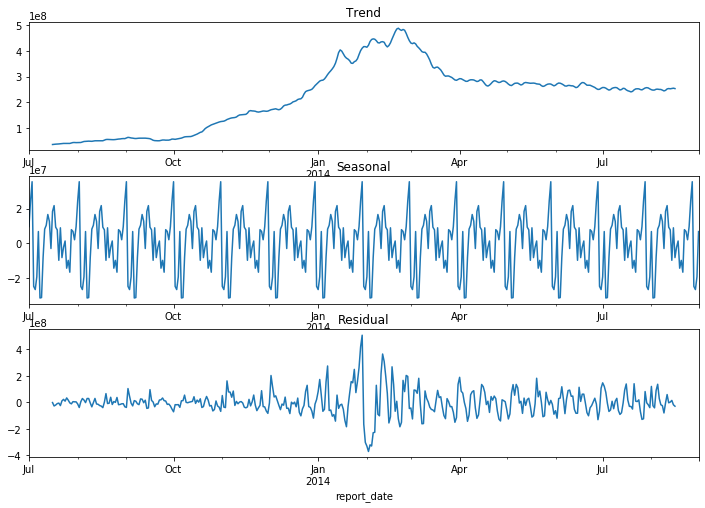

In [15]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

def plot_stl(data):
    #three parts, trends, seasonal, residual
    result = sm.tsa.seasonal_decompose(data,freq=30)
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)
    
    result.trend.plot(ax=ax1, title='Trend')
    result.seasonal.plot(ax=ax2, title='Seasonal')
    result.resid.plot(ax=ax3, title='Residual')
    
plot_stl(purchase.total_purchase_amt)

In [16]:
purchase['ds'] = purchase.index
purchase.rename(columns={'total_purchase_amt':'y'},inplace=True)
purchase

,y,ds
report_date,,
2013-07-01,32488348,2013-07-01
2013-07-02,29037390,2013-07-02
2013-07-03,27270770,2013-07-03
2013-07-04,18321185,2013-07-04
2013-07-05,11648749,2013-07-05
...,...,...
2014-08-27,302194801,2014-08-27
2014-08-28,245082751,2014-08-28
2014-08-29,267554713,2014-08-29


In [17]:
redeem['ds'] = redeem.index
redeem.rename(columns={'total_redeem_amt':'y'},inplace=True)
redeem.head()

,y,ds
report_date,,
2013-07-01,5525022,2013-07-01
2013-07-02,2554548,2013-07-02
2013-07-03,5953867,2013-07-03
2013-07-04,6410729,2013-07-04
2013-07-05,2763587,2013-07-05


In [18]:
purchase = purchase.reset_index(drop=True)
redeem = redeem.reset_index(drop=True)
purchase.head()

,y,ds
0,32488348,2013-07-01
1,29037390,2013-07-02
2,27270770,2013-07-03
3,18321185,2013-07-04
4,11648749,2013-07-05


# prophet

In [22]:
from fbprophet import Prophet

model = Prophet(seasonality_prior_scale=0.1, n_changepoints=300)
model.fit(purchase)
future = model.make_future_dataframe(periods=30)
purchase_pred = model.predict(future)
purchase_pred

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/Leigh/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  (dates - pd.datetime(1970, 1, 1))
/Users/Leigh/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/Users/Leigh/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  (dates - pd.datetime

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-07-01,5.918199e+06,-7.093158e+07,1.633460e+08,5.918199e+06,5.918199e+06,4.477899e+07,4.477899e+07,4.477899e+07,4.477899e+07,4.477899e+07,4.477899e+07,0.0,0.0,0.0,5.069719e+07
1,2013-07-02,6.719246e+06,-5.597773e+07,1.693176e+08,6.719246e+06,6.719246e+06,4.753676e+07,4.753676e+07,4.753676e+07,4.753676e+07,4.753676e+07,4.753676e+07,0.0,0.0,0.0,5.425601e+07
2,2013-07-03,7.520293e+06,-6.511813e+07,1.553207e+08,7.520293e+06,7.520293e+06,3.765523e+07,3.765523e+07,3.765523e+07,3.765523e+07,3.765523e+07,3.765523e+07,0.0,0.0,0.0,4.517552e+07
3,2013-07-04,8.321340e+06,-8.697884e+07,1.363787e+08,8.321340e+06,8.321340e+06,1.949540e+07,1.949540e+07,1.949540e+07,1.949540e+07,1.949540e+07,1.949540e+07,0.0,0.0,0.0,2.781674e+07
4,2013-07-05,9.122387e+06,-1.203718e+08,9.733501e+07,9.122387e+06,9.122387e+06,-1.786111e+07,-1.786111e+07,-1.786111e+07,-1.786111e+07,-1.786111e+07,-1.786111e+07,0.0,0.0,0.0,-8.738720e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,2014-09-26,1.991173e+08,5.425198e+07,2.897438e+08,1.974391e+08,2.007098e+08,-1.786111e+07,-1.786111e+07,-1.786111e+07,-1.786111e+07,-1.786111e+07,-1.786111e+07,0.0,0.0,0.0,1.812562e+08
453,2014-09-27,1.983594e+08,1.330323e+07,2.436805e+08,1.966001e+08,2.000422e+08,-6.945591e+07,-6.945591e+07,-6.945591e+07,-6.945591e+07,-6.945591e+07,-6.945591e+07,0.0,0.0,0.0,1.289034e+08
454,2014-09-28,1.976014e+08,1.809944e+07,2.458096e+08,1.957480e+08,1.993831e+08,-6.214936e+07,-6.214936e+07,-6.214936e+07,-6.214936e+07,-6.214936e+07,-6.214936e+07,0.0,0.0,0.0,1.354520e+08
455,2014-09-29,1.968434e+08,1.301393e+08,3.604831e+08,1.948920e+08,1.987381e+08,4.477899e+07,4.477899e+07,4.477899e+07,4.477899e+07,4.477899e+07,4.477899e+07,0.0,0.0,0.0,2.416224e+08


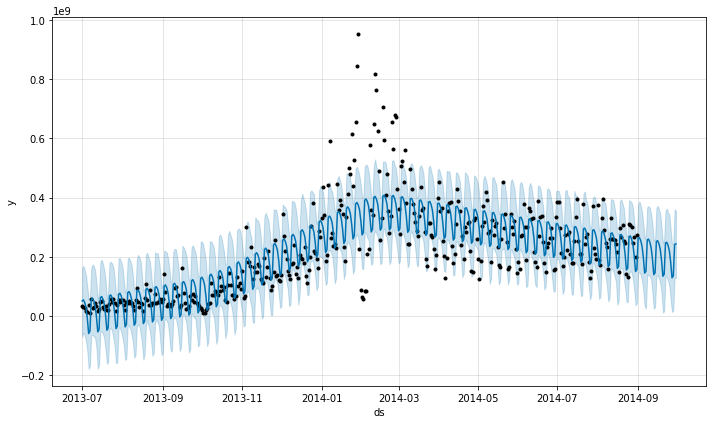

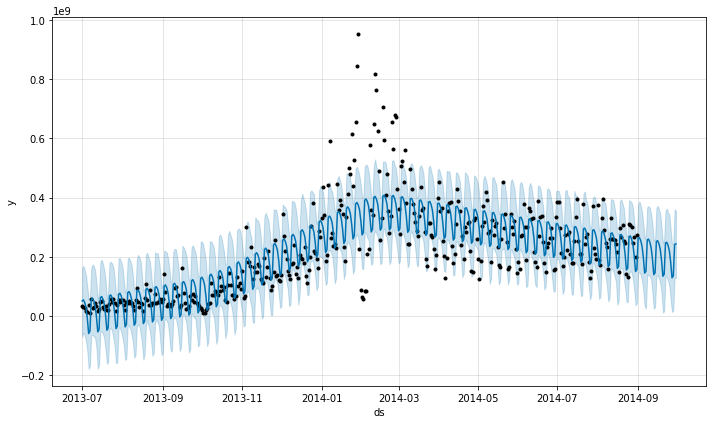

In [23]:
model.plot(purchase_pred)

In [24]:
model2 = Prophet(seasonality_prior_scale=0.1, n_changepoints=300)
model2.fit(redeem)
future = model2.make_future_dataframe(periods=30)
redeem_pred = model2.predict(future)
redeem_pred

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/Leigh/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  (dates - pd.datetime(1970, 1, 1))
/Users/Leigh/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/Users/Leigh/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  (dates - pd.datetime

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-07-01,-1.540232e+07,-4.915027e+07,1.257538e+08,-1.540232e+07,-1.540232e+07,4.896540e+07,4.896540e+07,4.896540e+07,4.896540e+07,4.896540e+07,4.896540e+07,0.0,0.0,0.0,3.356309e+07
1,2013-07-02,-1.466562e+07,-7.764769e+07,8.912833e+07,-1.466562e+07,-1.466562e+07,2.273316e+07,2.273316e+07,2.273316e+07,2.273316e+07,2.273316e+07,2.273316e+07,0.0,0.0,0.0,8.067546e+06
2,2013-07-03,-1.392892e+07,-6.591397e+07,9.530501e+07,-1.392892e+07,-1.392892e+07,2.487983e+07,2.487983e+07,2.487983e+07,2.487983e+07,2.487983e+07,2.487983e+07,0.0,0.0,0.0,1.095091e+07
3,2013-07-04,-1.319222e+07,-9.265566e+07,8.055083e+07,-1.319222e+07,-1.319222e+07,6.122890e+06,6.122890e+06,6.122890e+06,6.122890e+06,6.122890e+06,6.122890e+06,0.0,0.0,0.0,-7.069331e+06
4,2013-07-05,-1.245552e+07,-1.047923e+08,6.313749e+07,-1.245552e+07,-1.245552e+07,-4.512282e+06,-4.512282e+06,-4.512282e+06,-4.512282e+06,-4.512282e+06,-4.512282e+06,0.0,0.0,0.0,-1.696780e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,2014-09-26,2.908759e+08,2.011728e+08,3.700567e+08,2.902154e+08,2.915572e+08,-4.512282e+06,-4.512282e+06,-4.512282e+06,-4.512282e+06,-4.512282e+06,-4.512282e+06,0.0,0.0,0.0,2.863636e+08
453,2014-09-27,2.910384e+08,1.437827e+08,3.171011e+08,2.903367e+08,2.917588e+08,-5.845963e+07,-5.845963e+07,-5.845963e+07,-5.845963e+07,-5.845963e+07,-5.845963e+07,0.0,0.0,0.0,2.325787e+08
454,2014-09-28,2.912009e+08,1.679387e+08,3.336078e+08,2.904671e+08,2.919573e+08,-3.972937e+07,-3.972937e+07,-3.972937e+07,-3.972937e+07,-3.972937e+07,-3.972937e+07,0.0,0.0,0.0,2.514715e+08
455,2014-09-29,2.913634e+08,2.567482e+08,4.297556e+08,2.905874e+08,2.921712e+08,4.896540e+07,4.896540e+07,4.896540e+07,4.896540e+07,4.896540e+07,4.896540e+07,0.0,0.0,0.0,3.403288e+08


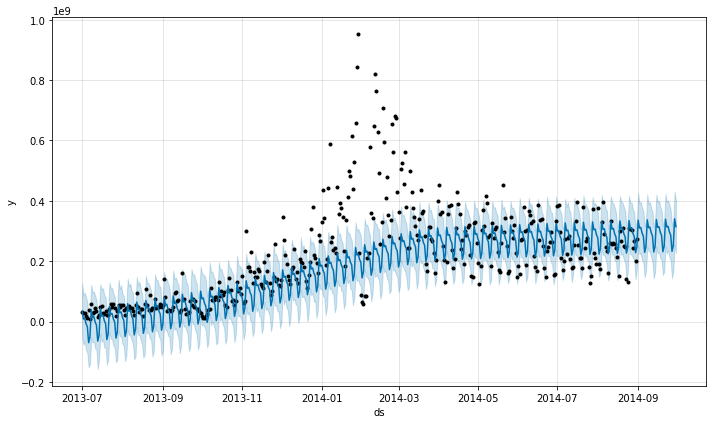

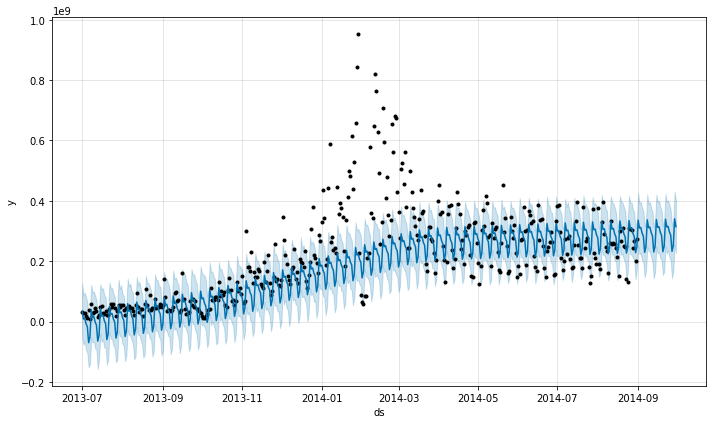

In [25]:
model.plot(redeem_pred)

In [27]:
purchase2 = purchase_pred[(purchase_pred['ds'] >= '2014-09-01') & (purchase_pred['ds'] <= '2014-09-30')][['ds','yhat']]  
purchase2.head()

,ds,yhat
427,2014-09-01,2.628455e+08
428,2014-09-02,2.648453e+08
429,2014-09-03,2.542058e+08
430,2014-09-04,2.352880e+08
431,2014-09-05,1.971735e+08


In [29]:
redeem2 = redeem_pred[(redeem_pred['ds'] >= '2014-09-01') & (redeem_pred['ds'] <= '2014-09-30')][['ds','yhat']]  
redeem2.head()

,ds,yhat
427,2014-09-01,3.357787e+08
428,2014-09-02,3.097089e+08
429,2014-09-03,3.120181e+08
430,2014-09-04,2.934237e+08
431,2014-09-05,2.829510e+08


In [31]:
result = pd.DataFrame()
result['ds'] = purchase2.ds
result['purchase_amt'] = purchase2.yhat
result['redeem_amt'] = redeem2.yhat
result.head()

,ds,purchase_amt,redeem_amt
427,2014-09-01,2.628455e+08,3.357787e+08
428,2014-09-02,2.648453e+08,3.097089e+08
429,2014-09-03,2.542058e+08,3.120181e+08
430,2014-09-04,2.352880e+08,2.934237e+08
431,2014-09-05,1.971735e+08,2.829510e+08


In [34]:
result['ds'] = result['ds'].apply(lambda x:str(x).replace('-','')[0:8])
result.head()

,ds,purchase_amt,redeem_amt
427,20140901,2.628455e+08,3.357787e+08
428,20140902,2.648453e+08,3.097089e+08
429,20140903,2.542058e+08,3.120181e+08
430,20140904,2.352880e+08,2.934237e+08
431,20140905,1.971735e+08,2.829510e+08


In [35]:
result.to_csv('prophet.csv', header=None, index=False)

# arima

/Users/Leigh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


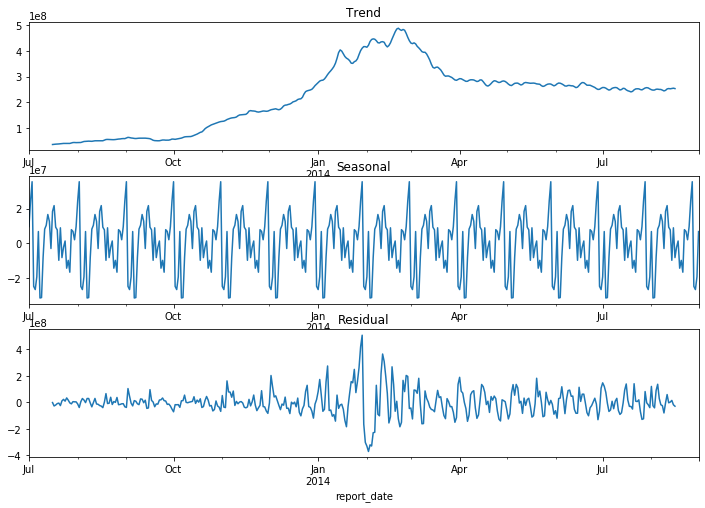

In [37]:
data = pd.read_csv('./Purchase Redemption Data/user_balance_table.csv',  parse_dates=['report_date'])
total_balance = data.groupby(['report_date'])['total_purchase_amt','total_redeem_amt'].sum()

purchase = total_balance[['total_purchase_amt']]
redeem = total_balance[['total_redeem_amt']]
import statsmodels.api as sm
import matplotlib.pyplot as plt

def plot_stl(data):
    #three parts, trends, seasonal, residual
    result = sm.tsa.seasonal_decompose(data,freq=30)
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)
    
    result.trend.plot(ax=ax1, title='Trend')
    result.seasonal.plot(ax=ax2, title='Seasonal')
    result.resid.plot(ax=ax3, title='Residual')
    
plot_stl(purchase.total_purchase_amt)

([<matplotlib.axis.XTick at 0x1290e35c0>,
 <a list of 37 Text xticklabel objects>)

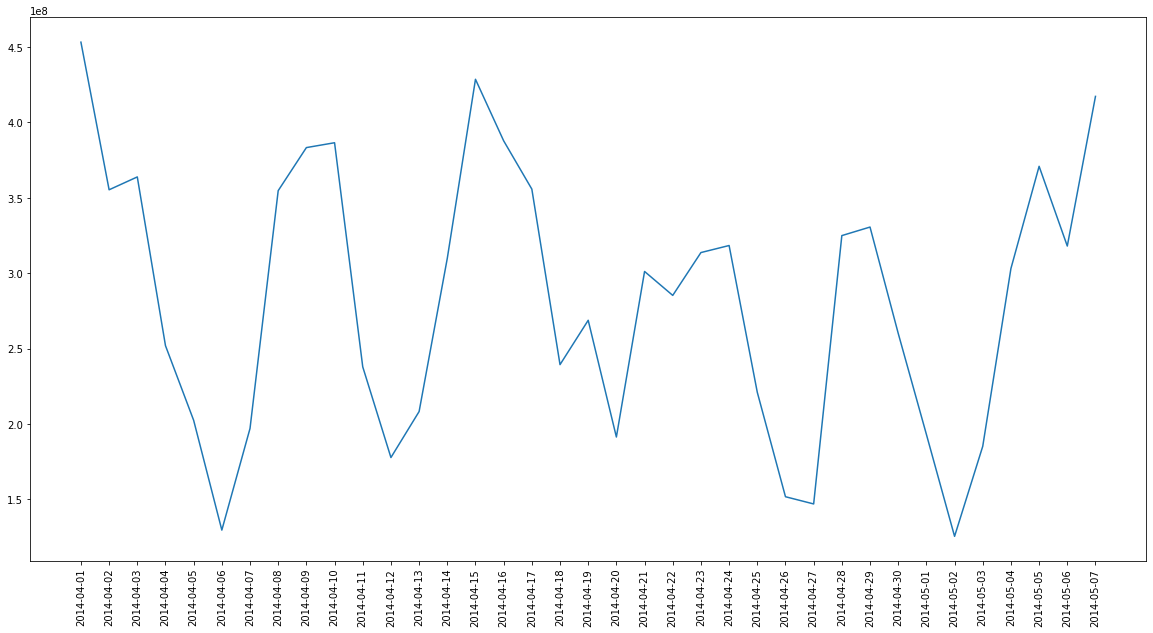

In [44]:
purchase2 = purchase[(purchase.index>='2014-04-01') & (purchase.index<='2014-05-07')]

plt.figure(figsize=(20,10))
plt.plot(purchase2.total_purchase_amt)
date_range=pd.date_range(('2014-04-01'),'2014-05-07')
plt.xticks(date_range, rotation=90)

In [59]:
# stationary
from statsmodels.tsa.stattools import adfuller
t = adfuller(purchase['total_purchase_amt'])
t
# not reject H0, not stationary
diff1 = purchase.diff(1)
t = adfuller(diff1[1:]['total_purchase_amt'])
t

(-7.947102224652354,
 3.1981868624879897e-12,
 18,
 407,
 {'1%': -3.4465195891135845,
  '5%': -2.8686676281678634,
  '10%': -2.5705668101226085},
 15918.844657651942)

In [61]:
from statsmodels.tsa.arima_model import ARIMA
# p,d,q

model= ARIMA(purchase, order=(7,1,5)).fit()
purchase_pred = model.predict('2014-09-01','2014-09-30',typ='levels')
purchase_pred

/Users/Leigh/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/Leigh/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


2014-09-01    3.310537e+08
2014-09-02    3.318774e+08
2014-09-03    3.338924e+08
2014-09-04    2.983213e+08
2014-09-05    2.407527e+08
2014-09-06    2.266134e+08
2014-09-07    2.435550e+08
2014-09-08    2.970859e+08
2014-09-09    3.321280e+08
2014-09-10    3.265218e+08
2014-09-11    2.916857e+08
2014-09-12    2.392716e+08
2014-09-13    2.253544e+08
2014-09-14    2.475276e+08
2014-09-15    2.950930e+08
2014-09-16    3.345013e+08
2014-09-17    3.280840e+08
2014-09-18    2.927118e+08
2014-09-19    2.448978e+08
2014-09-20    2.275706e+08
2014-09-21    2.530212e+08
2014-09-22    2.980712e+08
2014-09-23    3.366751e+08
2014-09-24    3.321969e+08
2014-09-25    2.947129e+08
2014-09-26    2.505392e+08
2014-09-27    2.318263e+08
2014-09-28    2.574451e+08
2014-09-29    3.025692e+08
2014-09-30    3.387025e+08
Freq: D, dtype: float64

In [63]:
model.aic

16669.646033968467

In [64]:
model2= ARIMA(purchase, order=(7,1,5)).fit()
redeem_pred = model2.predict('2014-09-01','2014-09-30',typ='levels')
redeem_pred 

/Users/Leigh/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/Leigh/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


2014-09-01    3.310537e+08
2014-09-02    3.318774e+08
2014-09-03    3.338924e+08
2014-09-04    2.983213e+08
2014-09-05    2.407527e+08
2014-09-06    2.266134e+08
2014-09-07    2.435550e+08
2014-09-08    2.970859e+08
2014-09-09    3.321280e+08
2014-09-10    3.265218e+08
2014-09-11    2.916857e+08
2014-09-12    2.392716e+08
2014-09-13    2.253544e+08
2014-09-14    2.475276e+08
2014-09-15    2.950930e+08
2014-09-16    3.345013e+08
2014-09-17    3.280840e+08
2014-09-18    2.927118e+08
2014-09-19    2.448978e+08
2014-09-20    2.275706e+08
2014-09-21    2.530212e+08
2014-09-22    2.980712e+08
2014-09-23    3.366751e+08
2014-09-24    3.321969e+08
2014-09-25    2.947129e+08
2014-09-26    2.505392e+08
2014-09-27    2.318263e+08
2014-09-28    2.574451e+08
2014-09-29    3.025692e+08
2014-09-30    3.387025e+08
Freq: D, dtype: float64

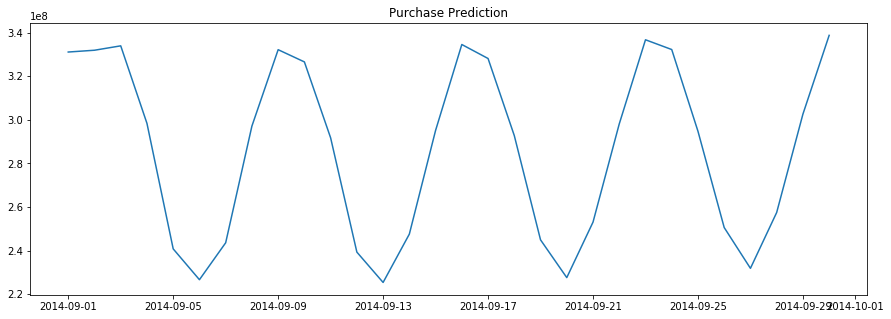

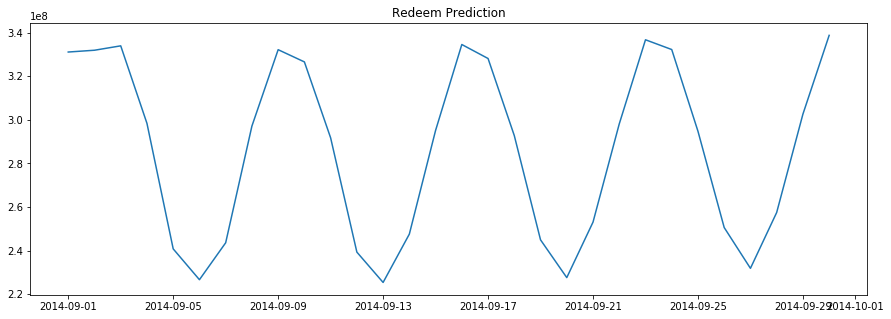

In [66]:
plt.figure(figsize=(15,5))
plt.title('Purchase Prediction')
plt.plot(purchase_pred)
plt.show()

plt.figure(figsize=(15,5))
plt.title('Redeem Prediction')
plt.plot(purchase_pred)

In [69]:
result = pd.DataFrame()
result['date'] =purchase_pred.index
result['purchase'] = purchase_pred.values
result['redeem'] = redeem_pred.values
result['date'] = result['date'].apply(lambda x: str(x).replace('-','')[0:8])
result

result.to_csv('arima.csv', header=None, index=False)

# rule base

In [204]:
data = pd.read_csv('./Purchase Redemption Data/user_balance_table.csv',  parse_dates=['report_date'])

In [205]:
def add_timestamp(data):
    data['report_date'] = pd.to_datetime(data['report_date'], format="%Y%m%d")
    
    data['day'] = data['report_date'].dt.day
    data['month'] = data['report_date'].dt.month
    data['year']= data['report_date'].dt.year
    data['week'] = data['report_date'].dt.week
    data['weekday'] = data['report_date'].dt.weekday #1～6，0为周一，6为周日
    
    return data

data = add_timestamp(data)
data.head()

/Users/Leigh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,...,share_amt,category1,category2,category3,category4,day,month,year,week,weekday
0,1,2014-08-05,20385,20383,2,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,5,8,2014,32,1
1,1,2014-08-08,20391,20389,2,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,8,8,2014,32,4
2,1,2014-08-11,20397,20395,2,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,11,8,2014,33,0
3,1,2014-08-14,20403,20401,2,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,14,8,2014,33,3
4,1,2014-08-17,20409,20407,2,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,17,8,2014,33,6


In [206]:
def get_total_balance(data, begin):
    df_temp = data.copy()
    df_temp = df_temp.groupby(['report_date'])['total_purchase_amt','total_redeem_amt'].sum()
    df_temp.reset_index(inplace=True)
    df_temp = df_temp[df_temp['report_date']>=begin]
    #print(df_temp)
    return df_temp
    
total_balance = get_total_balance(data, '2014-03-01')
total_balance.head()

/Users/Leigh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,report_date,total_purchase_amt,total_redeem_amt
274,2014-04-01,453320585,277429358
275,2014-04-02,355347118,272612066
276,2014-04-03,363877120,266605457
277,2014-04-04,251895894,200192637
278,2014-04-05,202336542,163199682


In [207]:
# generate data
import datetime
import numpy as np

def generate_test_data(data):
    total_balance = data.copy()
    start = datetime.datetime(2014,9,1)
    end = datetime.datetime(2014,10,1)
    testdata = []
    while start!=end:
        # add three columns
        temp = [start, np.nan, np.nan]
        testdata.append(temp)
        start += datetime.timedelta(days=1)
    testdata = pd.DataFrame(testdata)
    testdata.columns = total_balance.columns
    total_balance = pd.concat([total_balance,testdata], axis=0)
    
    return total_balance

total_balance = generate_test_data(total_balance)
total_balance.head()

,report_date,total_purchase_amt,total_redeem_amt
274,2014-04-01,453320585.0,277429358.0
275,2014-04-02,355347118.0,272612066.0
276,2014-04-03,363877120.0,266605457.0
277,2014-04-04,251895894.0,200192637.0
278,2014-04-05,202336542.0,163199682.0


In [208]:
# add time 
total_balance = add_timestamp(total_balance)
total_balance.head()

/Users/Leigh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


,report_date,total_purchase_amt,total_redeem_amt,day,month,year,week,weekday
274,2014-04-01,453320585.0,277429358.0,1,4,2014,14,1
275,2014-04-02,355347118.0,272612066.0,2,4,2014,14,2
276,2014-04-03,363877120.0,266605457.0,3,4,2014,14,3
277,2014-04-04,251895894.0,200192637.0,4,4,2014,14,4
278,2014-04-05,202336542.0,163199682.0,5,4,2014,14,5


In [209]:
temp = total_balance.copy()

In [210]:
total_balance = temp.copy()
#total_balance = total_balnce[['report_date','total_purchase_amt','total_redeem_amt']]
weekday_weight = total_balance[['weekday','total_purchase_amt','total_redeem_amt']].groupby('weekday', as_index=False).mean()
weekday_weight = weekday_weight.rename(columns={'total_purchase_amt':'purchase_weekday','total_redeem_amt':'redeem_weekday'})
weekday_weight.head()

,weekday,purchase_weekday,redeem_weekday
0,0,3.075183e+08,3.268733e+08
1,1,3.173125e+08,3.138971e+08
2,2,3.133103e+08,3.076354e+08
3,3,3.019386e+08,2.763898e+08
4,4,2.398712e+08,2.591565e+08


In [211]:
weekday_weight['purchase_weekday'] /= np.mean(total_balance['total_purchase_amt'])
weekday_weight['redeem_weekday'] /= np.mean(total_balance['total_redeem_amt'])
weekday_weight.head()

,weekday,purchase_weekday,redeem_weekday
0,0,1.163446,1.226999
1,1,1.200501,1.178289
2,2,1.185360,1.154784
3,3,1.142336,1.037496
4,4,0.907514,0.972807


In [212]:
total_balance = pd.merge(total_balance, weekday_weight, on='weekday', how='left')
total_balance.head()

,report_date,total_purchase_amt,total_redeem_amt,day,month,year,week,weekday,purchase_weekday,redeem_weekday
0,2014-04-01,453320585.0,277429358.0,1,4,2014,14,1,1.200501,1.178289
1,2014-04-02,355347118.0,272612066.0,2,4,2014,14,2,1.185360,1.154784
2,2014-04-03,363877120.0,266605457.0,3,4,2014,14,3,1.142336,1.037496
3,2014-04-04,251895894.0,200192637.0,4,4,2014,14,4,0.907514,0.972807
4,2014-04-05,202336542.0,163199682.0,5,4,2014,14,5,0.695258,0.696494


In [213]:
# calculate frequency of Mon to Sun during 1~31
weekday_count = total_balance[['report_date', 'weekday', 'day']].groupby(['day','weekday'], as_index=False).count()

weekday_count = pd.merge(weekday_count, weekday_weight, on='weekday')
weekday_count.head()

,day,weekday,report_date,purchase_weekday,redeem_weekday
0,1,0,1,1.163446,1.226999
1,2,0,1,1.163446,1.226999
2,4,0,1,1.163446,1.226999
3,5,0,1,1.163446,1.226999
4,7,0,2,1.163446,1.226999


In [214]:
# day count
weekday_count['purchase_weekday'] = weekday_count['purchase_weekday'] * weekday_count['report_date'] / len(np.unique(total_balance['month']))
weekday_count

,day,weekday,report_date,purchase_weekday,redeem_weekday
0,1,0,1,0.193908,1.226999
1,2,0,1,0.193908,1.226999
2,4,0,1,0.193908,1.226999
3,5,0,1,0.193908,1.226999
4,7,0,2,0.387815,1.226999
...,...,...,...,...,...
148,26,5,2,0.231753,0.696494
149,27,5,1,0.115876,0.696494
150,28,5,1,0.115876,0.696494
151,30,5,1,0.115876,0.696494


In [215]:
weekday_count['redeem_weekday'] = weekday_count['redeem_weekday'] * weekday_count['report_date'] / len(np.unique(total_balance['month']))

In [216]:
weekday_count

,day,weekday,report_date,purchase_weekday,redeem_weekday
0,1,0,1,0.193908,0.204500
1,2,0,1,0.193908,0.204500
2,4,0,1,0.193908,0.204500
3,5,0,1,0.193908,0.204500
4,7,0,2,0.387815,0.409000
...,...,...,...,...,...
148,26,5,2,0.231753,0.232165
149,27,5,1,0.115876,0.116082
150,28,5,1,0.115876,0.116082
151,30,5,1,0.115876,0.116082


In [217]:
day_rate = weekday_count.drop(['weekday', 'report_date'], axis=1).groupby('day', as_index=False).sum()
day_rate.head()


,day,purchase_weekday,redeem_weekday
0,1,1.054552,1.056222
1,2,1.056240,1.064026
2,3,1.013134,0.974668
3,4,1.003197,1.018057
4,5,0.967386,0.968096


In [218]:
day_mean = total_balance[['day','total_purchase_amt','total_redeem_amt']].groupby('day', as_index=False).mean()
day_mean.head()

,day,total_purchase_amt,total_redeem_amt
0,1,317833790.8,239465353.0
1,2,242510145.4,213088962.4
2,3,258315822.0,253586215.8
3,4,274346984.4,300959116.6
4,5,303493584.8,264483517.0


In [219]:
day_pred = pd.merge(day_mean, day_rate, on='day', how='left')
day_pred['total_purchase_amt'] /= day_pred['purchase_weekday']
day_pred['total_redeem_amt'] /= day_pred['redeem_weekday']
day_pred.head()



,day,total_purchase_amt,total_redeem_amt,purchase_weekday,redeem_weekday
0,1,3.013922e+08,2.267189e+08,1.054552,1.056222
1,2,2.295976e+08,2.002666e+08,1.056240,1.064026
2,3,2.549670e+08,2.601770e+08,1.013134,0.974668
3,4,2.734726e+08,2.956211e+08,1.003197,1.018057
4,5,3.137256e+08,2.731996e+08,0.967386,0.968096


In [220]:
for index, row in day_pred.iterrows():
    if row['day']==31:
        break
    day_pred.loc[index,'report_date'] = pd.to_datetime('2014/09/'+str(int(row['day'])))
day_pred

,day,total_purchase_amt,total_redeem_amt,purchase_weekday,redeem_weekday,report_date
0,1,3.013922e+08,2.267189e+08,1.054552,1.056222,2014-09-01
1,2,2.295976e+08,2.002666e+08,1.056240,1.064026,2014-09-02
2,3,2.549670e+08,2.601770e+08,1.013134,0.974668,2014-09-03
3,4,2.734726e+08,2.956211e+08,1.003197,1.018057,2014-09-04
4,5,3.137256e+08,2.731996e+08,0.967386,0.968096,2014-09-05
5,6,2.742075e+08,2.696368e+08,0.902444,0.914879,2014-09-06
6,7,2.616379e+08,2.235506e+08,1.010477,1.014370,2014-09-07
7,8,2.859838e+08,2.546492e+08,1.054552,1.056222,2014-09-08
8,9,2.781962e+08,2.364320e+08,1.056240,1.064026,2014-09-09
9,10,3.100221e+08,2.561429e+08,1.013134,0.974668,2014-09-10


In [221]:
# base * period factor
day_pred['weekday'] = day_pred['report_date'].dt.weekday
day_pred.head()

,day,total_purchase_amt,total_redeem_amt,purchase_weekday,redeem_weekday,report_date,weekday
0,1,3.013922e+08,2.267189e+08,1.054552,1.056222,2014-09-01,0.0
1,2,2.295976e+08,2.002666e+08,1.056240,1.064026,2014-09-02,1.0
2,3,2.549670e+08,2.601770e+08,1.013134,0.974668,2014-09-03,2.0
3,4,2.734726e+08,2.956211e+08,1.003197,1.018057,2014-09-04,3.0
4,5,3.137256e+08,2.731996e+08,0.967386,0.968096,2014-09-05,4.0


In [222]:
day_pred = day_pred[['day', 'total_purchase_amt','total_redeem_amt','report_date','weekday']]
day_pred.head()

,day,total_purchase_amt,total_redeem_amt,report_date,weekday
0,1,3.013922e+08,2.267189e+08,2014-09-01,0.0
1,2,2.295976e+08,2.002666e+08,2014-09-02,1.0
2,3,2.549670e+08,2.601770e+08,2014-09-03,2.0
3,4,2.734726e+08,2.956211e+08,2014-09-04,3.0
4,5,3.137256e+08,2.731996e+08,2014-09-05,4.0


In [223]:
day_pred = pd.merge(day_pred, weekday_weight, on='weekday')
day_pred.head()

,day,total_purchase_amt,total_redeem_amt,report_date,weekday,purchase_weekday,redeem_weekday
0,1,3.013922e+08,2.267189e+08,2014-09-01,0.0,1.163446,1.226999
1,8,2.859838e+08,2.546492e+08,2014-09-08,0.0,1.163446,1.226999
2,15,2.821084e+08,2.155727e+08,2014-09-15,0.0,1.163446,1.226999
3,22,2.401903e+08,2.707002e+08,2014-09-22,0.0,1.163446,1.226999
4,29,2.476134e+08,2.764218e+08,2014-09-29,0.0,1.163446,1.226999


In [224]:
day_pred['total_purchase_amt'] *= day_pred['purchase_weekday']
day_pred['total_redeem_amt'] *= day_pred['redeem_weekday']

day_pred = day_pred.sort_values('report_date')[['report_date','total_purchase_amt','total_redeem_amt']]
day_pred.head()

,report_date,total_purchase_amt,total_redeem_amt
0,2014-09-01,3.506536e+08,2.781837e+08
5,2014-09-02,2.756322e+08,2.359720e+08
10,2014-09-03,3.022276e+08,3.004483e+08
14,2014-09-04,3.123977e+08,3.067058e+08
18,2014-09-05,2.847104e+08,2.657704e+08


In [225]:
day_pred['report_date'] = day_pred['report_date'].apply(lambda x: str(x).replace('-','')[0:8])
day_pred.to_csv('rule_base.csv', header=None, index=False)